# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Coleta de dados e Preparação de atributos</span>


## <span style="color:darkred">Discretização</span>

Material Produzido por Moacir Antonelli Ponti<br>
*colaboração de Eugenio Ferreira Cabral*

CeMEAI - ICMC/USP São Carlos

---

## Discretização

Valores contínuos podem representar um desafio na análise de dados

* alguns métodos não permitem o uso de valores contínuos, seja como atributo de entrada ou saída.

* assumir valor contínuo pode ser inviável a depender da quantidade de dados disponíveis e sua cobertura no espaço contínuo


**Discretizar** é criar um novo atributo discreto (com valores finitos e bem definidos) a partir de um atributo contínuo.

* podemos também re-aplicar discretização em dados já discretos, reduzindo a quantidade de valores possíveis

---
   
Vamos usar uma base com dados do PIB e população (dados reais) e outros indicadores (simulados a partir de dados reais) formulada para exemplificar esse conceito, contendo os seguintes atributos:

- gid - identificador geográfico do município
- UF - unidade federativa
- nome - nome do município
- Censo - ano do censo relativo aos dados
- PIB - total do PIB
- pop - populacao em 2009
- classe - classe do município (de 1 a 5)
- desemprego - índice de desemprego na cidade no ano do Censo
- pop_sanea - porcentagem da população servida por saneamento básico 
- expec_vida - expectativa de vida ao nascer no ano de 2017
- pobreza - porcentagem de pessoas em extrema pobreza
- IDH - índice em 2010
- urbaniz - escala de urbanização do município: rural, baixo, médio, alto, muito alto
- dens_pop_urbana - índice de densidade populacional urbana: baixa, média, alta, muito alta
    
    
OBS: desemprego, IDH, pobreza e pop_sanea por município foram simulados com base nos dados reais dos estados

    

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# carregando dados
data = pd.read_csv("./dados/municipios_mba.csv")
data

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,1011,TOCANTINS,Tocantinópolis,2010.0,124657.000000,21826,1,6.5,28.405306,75.0,12.6,705,rural,muito baixa
5561,5545,TOCANTINS,Tupirama,2010.0,34883.894531,1474,3,4.6,29.447854,74.8,12.9,694,rural,muito baixa
5562,5546,TOCANTINS,Tupiratins,2010.0,30757.437500,2143,2,7.0,27.172728,74.2,12.6,696,rural,muito baixa
5563,5141,TOCANTINS,Wanderlândia,2010.0,66966.773438,9493,1,5.4,27.762133,74.4,12.7,692,rural,muito baixa


## Intervalo ou Histograma

Método que usa intervalos (bins) e distribui os elementos para cada intervalo correspondente

Vamos analisar o atributo expec_vida e discretizá-lo utilizando intervalos


[73.6 74.2 75.3 73.4 75.4 72.6 72.5 74.6 73.3 74.8 74.9 74.1 73.7 75.2
 73.1 72.  72.8 71.8 70.6 70.7 73.5 72.7 71.7 70.5 71.4 71.3 71.1 72.4
 71.9 73.  70.9 73.2 71.6 72.1 71.  72.2 70.8 71.5 72.9 71.2 73.8 75.
 74.3 74.4 74.  72.3 75.1 73.9 74.7 74.5 75.6 75.5 79.3 78.  77.8 77.2
 78.6 79.  78.4 77.1 79.4 78.3 77.5 77.9 78.5 77.3 77.  79.8 79.1 77.6
 79.6 79.5 77.7 79.7 77.4 78.8 79.2 78.7 80.  78.1 78.2 78.9 75.7 75.8
 68.7 68.9 68.8 70.2 69.1 69.  70.3 69.8 70.4 69.5 68.6 69.7 69.6 70.1
 69.9 69.4 69.2 70.  69.3 68.5 75.9 76.  76.4 76.6 76.2 76.9 76.1 76.8
 76.5 76.7 76.3 80.5 80.1 79.9 80.4 80.9 80.8 80.6 80.3 80.2 80.7]


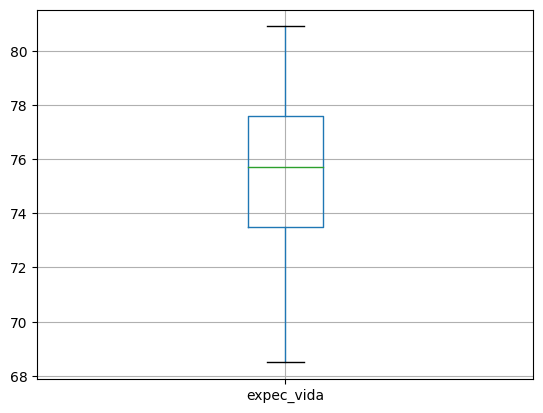

In [2]:
atts = 'expec_vida'
data.boxplot(atts)
print(data[atts].unique())

Olhando para o histograma, que nos dá a frequência de faixas de valores, é possível observar como os dados estão distribuídos e optar por re-definir os dados com base em novos intervalos.

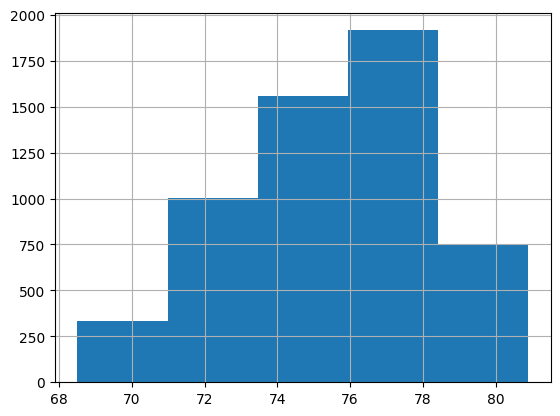

In [3]:
data[atts].hist(bins=5)
plt.show()

#### Utilizando intervalos fixos e frequência variável

In [4]:
# copiar original
data_orig = data.copy()

# definir intervalos
interv_idade = np.arange(68,82,3)
print(interv_idade)

# (68-71]
# (71-74]
# (74-77] ....

[68 71 74 77 80]


In [5]:
# realizar discretizacao e armazenar
expec_vida_disc =  pd.cut(data['expec_vida'], bins=interv_idade)

In [6]:
data['expec_vida']

0       73.6
1       74.2
2       75.3
3       73.4
4       75.4
        ... 
5560    75.0
5561    74.8
5562    74.2
5563    74.4
5564    74.3
Name: expec_vida, Length: 5565, dtype: float64

In [7]:
expec_vida_disc

0       (71, 74]
1       (74, 77]
2       (74, 77]
3       (71, 74]
4       (74, 77]
          ...   
5560    (74, 77]
5561    (74, 77]
5562    (74, 77]
5563    (74, 77]
5564    (74, 77]
Name: expec_vida, Length: 5565, dtype: category
Categories (4, interval[int64, right]): [(68, 71] < (71, 74] < (74, 77] < (77, 80]]

In [8]:
# inserir nova coluna na pos. 10
data.insert(10, 'expec_vida_disc', expec_vida_disc) 
#data['expec_vida_disc'] = expec_vida_disc

# exibir o tipo da coluna
print(data['expec_vida_disc'].dtype.name)

category


In [9]:
print(data['expec_vida'].dtype.name)

float64


In [10]:
# tentando exibir histograma da nova variavel
#data['expec_vida_disc'].hist()

In [11]:
# para variáveis categoricas podemos usar value_counts
data['expec_vida_disc'].value_counts()

(74, 77]    1999
(77, 80]    1770
(71, 74]    1348
(68, 71]     360
Name: expec_vida_disc, dtype: int64

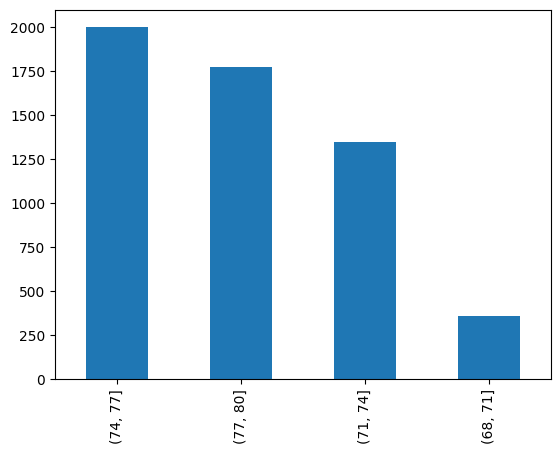

In [12]:
data['expec_vida_disc'].value_counts().plot(kind='bar')
plt.show()

Ao invés dos rótulos automáticos, podemos nomear os intervalos:

In [13]:
interv_idade = np.arange(68,82,3)
labels = ['muito baixo', 'baixo', 'médio', 'alto']
print(interv_idade)
print(labels)

[68 71 74 77 80]
['muito baixo', 'baixo', 'médio', 'alto']


In [14]:
data = data_orig.copy()

# realizar discretizacao e armazenar
expec_vida_disc =  pd.cut(data['expec_vida'], bins=interv_idade, labels=labels)
# inserir nova coluna
data.insert(10, 'expec_vida_disc', expec_vida_disc)

# exibir o tipo da coluna
print(data['expec_vida_disc'].dtype.name)
data['expec_vida_disc'].value_counts()

category


médio          1999
alto           1770
baixo          1348
muito baixo     360
Name: expec_vida_disc, dtype: int64

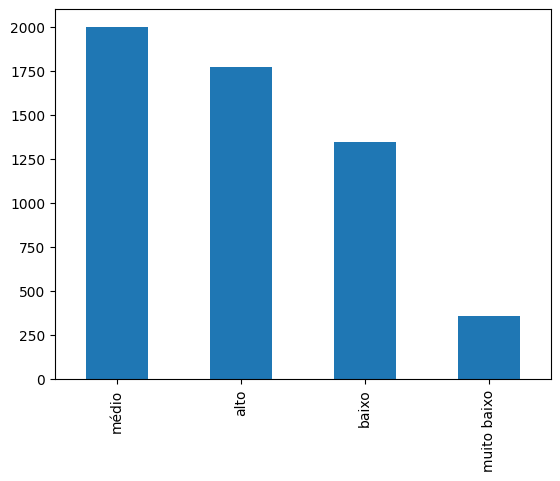

In [15]:
data['expec_vida_disc'].value_counts().plot(kind='bar')
plt.show()

In [16]:
print(data.groupby('UF').expec_vida_disc.value_counts())

UF         expec_vida_disc
ACRE       médio              12
           baixo              10
           muito baixo         0
           alto                0
ALAGOAS    baixo              87
                              ..
SÃO PAULO  baixo               0
TOCANTINS  baixo              97
           médio              42
           muito baixo         0
           alto                0
Name: expec_vida_disc, Length: 108, dtype: int64


#### Utilizando quantis fixos e frequência balanceada

Pandas ainda permite discretização baseada em **quantis**

<font color="red">Aqui usamos os mesmos rótulos, mas a interpretação será diferente, pois os dados serão definidos por *quantis* e não por intervalos fixos</font>


In [17]:
labels = ['muito baixo', 'baixo', 'médio', 'alto']

# realizar discretizacao e armazenar
expec_vida_qdisc =  pd.qcut(data['expec_vida'], 4, labels=labels)
# inserir nova coluna
data.insert(11, 'expec_vida_4quant', expec_vida_qdisc)

# exibir o tipo da coluna
print(data['expec_vida_4quant'].value_counts())


baixo          1409
muito baixo    1408
médio          1378
alto           1370
Name: expec_vida_4quant, dtype: int64


In [18]:
# realizar discretizacao e armazenar
expec_vida_qdisc_nolabel =  pd.qcut(data['expec_vida'], 4)
print(expec_vida_qdisc_nolabel.value_counts())

(73.5, 75.7]      1409
(68.499, 73.5]    1408
(75.7, 77.6]      1378
(77.6, 80.9]      1370
Name: expec_vida, dtype: int64


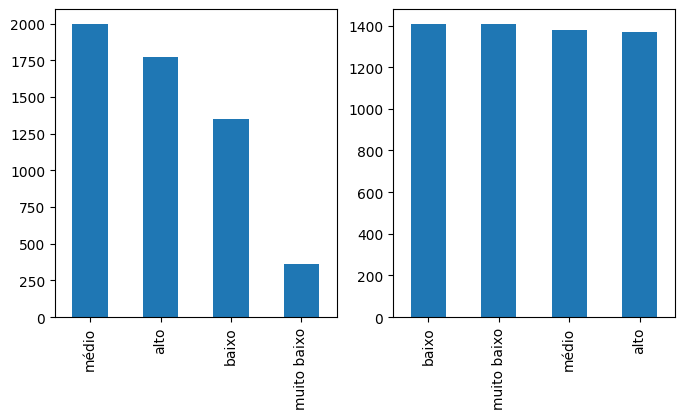

In [19]:
plt.figure(figsize=(8,4))
plt.subplot(121)
data['expec_vida_disc'].value_counts().plot(kind='bar')
plt.subplot(122)
data['expec_vida_4quant'].value_counts().plot(kind='bar')
plt.show()

## Agrupamento

Método que agrupa valores considerando uma ou mais variáveis e considera valores discretos como o rótulo dos grupos.

É fundamental nesse caso:
1. Conhecer o método de agrupamento sendo utilizado e como funciona
2. Entender a distância utilizada para comparar os exemplos, já que algoritmos para análise de agrupamentos são fortemente dependentes da distância utilizada.

Para exemplificar, vamos analisar o atributo expec_vida e discretizá-lo usando o método de agrupamento por Mistura de Gaussianas (Gaussian Mixture), e a distância Euclidiana.

Importante: os rótulos atribuídos aos grupos não necessariamente indicam a ordem numérica da variável original.

In [20]:
from sklearn.mixture import GaussianMixture

X = np.array(data['expec_vida']).reshape(-1,1)

gmm = GaussianMixture(n_components=4, random_state=10).fit(X)

probs = np.round(gmm.predict_proba(X), 3)

clusters = gmm.predict(X)

[[0.982 0.    0.018 0.   ]
 [0.073 0.001 0.926 0.   ]
 [0.279 0.    0.721 0.   ]
 [0.145 0.    0.854 0.   ]
 [0.087 0.001 0.912 0.   ]
 [0.795 0.    0.205 0.   ]
 [0.99  0.    0.01  0.   ]
 [0.893 0.    0.107 0.   ]
 [0.915 0.    0.085 0.   ]
 [0.915 0.    0.085 0.   ]]
[0 2 2 2 2 0 0 0 0 0]


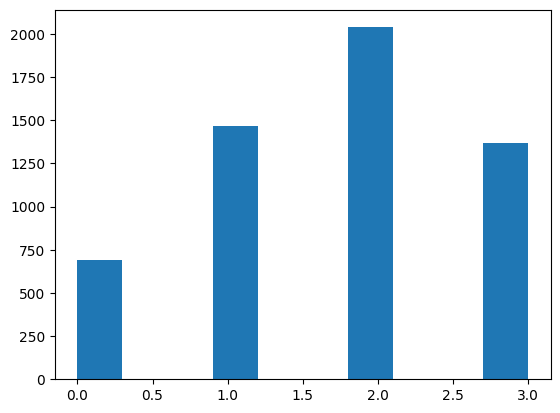

In [21]:
print(probs[30:40,:])
print(clusters[30:40])

h = plt.hist(clusters)
plt.show()

In [22]:
# atribuindo a nova variável ao dataframe
data['expec_vida_clu'] = clusters

# verificando como ficou o agrupamento em termos de mínimos e máximos
print(data.groupby('expec_vida_clu').expec_vida.min())
print(data.groupby('expec_vida_clu').expec_vida.max())

expec_vida_clu
0    68.5
1    75.6
2    72.3
3    77.7
Name: expec_vida, dtype: float64
expec_vida_clu
0    72.2
1    77.6
2    75.5
3    80.9
Name: expec_vida, dtype: float64


## E os valores nulos / faltantes?

Temos que tratar caso a caso, pois o principal problema na discretização é estar *indefinido* qual sua ordenação/posição.


## Resumo dos discretizadores + Bônus *sklearn*

<table align="center">
	<thead>
		<tr>
			<th>Função</th>
			<th>Observação</th>
		</tr>
    </thead>
    <tbody>
		<tr>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html">cut (pandas)</a></td>
            <td>Cria intervalos de tamanhos iguais mas com frequencias de amostras desiguais em cada intervalo.</td>
        </tr>
		<tr>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html">qcut (pandas)</a></td>
            <td>Cria intervalos de tamanhos diferentes mas com frequencia de amostras iguais em cada intervalo.</td>
		</tr>
        <tr>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html">KBinsDiscretizer (sklearn)</a></td>
            <td>Cria intervalos utilizando a estratégia especificada por parâmetro e permite fazer a transformação inversa.</td>
		</tr>
	</tbody>
</table>

In [23]:
amostra = pd.DataFrame(np.random.normal(loc=50, scale=20, size=50), columns=['value'])

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

In [25]:
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
amostra['value_bins'] = kbd.fit_transform(amostra[['value']])
print(amostra['value_bins'].value_counts())
print(kbd.bin_edges_)

1.0    20
2.0    16
3.0    12
0.0     2
Name: value_bins, dtype: int64
[array([-12.80972187,  13.78809523,  40.38591234,  66.98372944,
         93.58154655])                                         ]


In [26]:
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
amostra['value_bins'] = kbd.fit_transform(amostra[['value']])
amostra['value_bins'].value_counts()

0.0    13
3.0    13
1.0    12
2.0    12
Name: value_bins, dtype: int64

In [27]:
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
amostra['value_bins'] = kbd.fit_transform(amostra[['value']])
amostra['value_bins'].value_counts()

1.0    18
2.0    17
3.0    13
0.0     2
Name: value_bins, dtype: int64

OBS: cuidado novamente com uso de algoritmo de agrupamento, em particular utilizando uma única variável

A vantagem do `KBinsDiscretizer` é que o modelo salva a transformação permitindo inverter

In [28]:
amostra

,value,value_bins
0,13.944473,1.0
1,67.977635,3.0
2,31.970922,1.0
3,48.270479,2.0
4,47.452931,2.0
5,90.025125,3.0
6,16.497258,1.0
7,82.173926,3.0
8,37.876954,1.0
9,28.021776,1.0


In [29]:
amostra['inv_bins'] = kbd.inverse_transform(amostra[['value_bins']])

In [30]:
amostra

,value,value_bins,inv_bins
0,13.944473,1.0,24.896548
1,67.977635,3.0,78.372388
2,31.970922,1.0,24.896548
3,48.270479,2.0,50.882251
4,47.452931,2.0,50.882251
5,90.025125,3.0,78.372388
6,16.497258,1.0,24.896548
7,82.173926,3.0,78.372388
8,37.876954,1.0,24.896548
9,28.021776,1.0,24.896548
